# Module 7 Assignment: Credit Card Fraud Detection

Author: Han-Yi Lin  
Date: 11/12/2021 

Credit card fraud detection is a process of data investigation and the development of a model that will provide the best results in revealing and preventing fraudulent transactions. This is achieved through bringing together all meaningful features of card users’ transactions. The information is then run through a subtly trained model that finds patterns and rules so that it can classify whether a transaction is fraudulent or is legitimate.

This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration Jan 1st 2019 to June 30th 2020. It covers 1000 customers doing transactions with a pool of 800 merchants.

- Loading and Inspecting Dataset
- Exploratory Data Analysis
   - Distribution of Fraud, Non-fraud
   - Converting Date Column
   - Deriving transaction hour, day of week, year month Features
   - Age
   - Gender
   - Category
   - Merchant
   - Transaction Amount
- Feature Engineering
   - One-hot encoding
- Historical Transactions
- Merge Historical Variables with Transactions
- Modeling
   - Logistic Regression
   - Decision Tree
   - Random Forest
   - Gradient Boosting

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading Dataset

In [2]:
# Reading two data sets and combining them into single data frame
df1_1 = pd.read_csv('C:/Users/Rita/Desktop/fraudTrain.csv')
df1_1 = df1_1.drop(df1_1.columns[0], axis=1)

df1_2 = pd.read_csv('C:/Users/Rita/Desktop/fraudTest.csv')
df1_2 = df1_2.drop(df1_2.columns[0], axis=1)

df = pd.concat([df1_1,df1_2])
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### Inspecting Data

In [3]:
# Showing DataFrame Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int6

In [4]:
# Checking all null values
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [5]:
df.shape

(1852394, 22)

In [6]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


### Distribution of Dependent Variables

In [7]:
# Distribution of fraud and non-fraud (imbalanced data with 0.5% fraud)
df_fraud = df[['is_fraud','trans_date_trans_time']].groupby('is_fraud').count().reset_index() # group by is_fraud
df_fraud.columns = ['is_fraud','count'] # column name
df_fraud['percentage'] = (df_fraud['count'] / df_fraud['count'].sum()) * 100 # add a percentage column
df_fraud

,is_fraud,count,percentage
0,0,1842743,99.478999
1,1,9651,0.521001


In [8]:
# Finiding unique values in each column
df.nunique()

trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

### Converting Date Column to Datetime

In [9]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time']) # pd.to_datetime()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    object        
 17  trans_num              object        
 18  unix_time              

### Deriving Transaction Hour Feature from Transaction Time Feature

In [11]:
df['trans_hour'] = df['trans_date_trans_time'].dt.hour # DataFrame.dt.hour
df['trans_hour']

0          0
1          0
2          0
3          0
4          0
          ..
555714    23
555715    23
555716    23
555717    23
555718    23
Name: trans_hour, Length: 1852394, dtype: int64

### Deriving Day of Week Feature from Transaction Time Feature

In [12]:
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name() # DataFrame.dt.day_name()
df['day_of_week'].head()

0    Tuesday
1    Tuesday
2    Tuesday
3    Tuesday
4    Tuesday
Name: day_of_week, dtype: object

### Deriving Year Month Feature from Transaction Time Feature

In [13]:
df['year_month'] = df['trans_date_trans_time'].dt.to_period('M') # DataFrame.dt.to_period(freq = 'M' or 'W' or 'D')
df['year_month'].head()

0    2019-01
1    2019-01
2    2019-01
3    2019-01
4    2019-01
Name: year_month, dtype: period[M]

### Deriving Age of the Customers

In [14]:
# Age of Customer = Trasaction Date - DOB
df['dob'] = pd.to_datetime(df['dob'])
df['dob'].head()

0   1988-03-09
1   1978-06-21
2   1962-01-19
3   1967-01-12
4   1986-03-28
Name: dob, dtype: datetime64[ns]

In [15]:
df['age'] = np.round((df['trans_date_trans_time'] - df['dob']) / np.timedelta64(1,'Y'))
df['age'].head()

0    31.0
1    41.0
2    57.0
3    52.0
4    33.0
Name: age, dtype: float64

In [16]:
df['age'].describe()

count    1.852394e+06
mean     4.626617e+01
std      1.741239e+01
min      1.400000e+01
25%      3.300000e+01
50%      4.400000e+01
75%      5.700000e+01
max      9.600000e+01
Name: age, dtype: float64

Average age of the customers is 46  
50% of the customers are at the age of 33-57

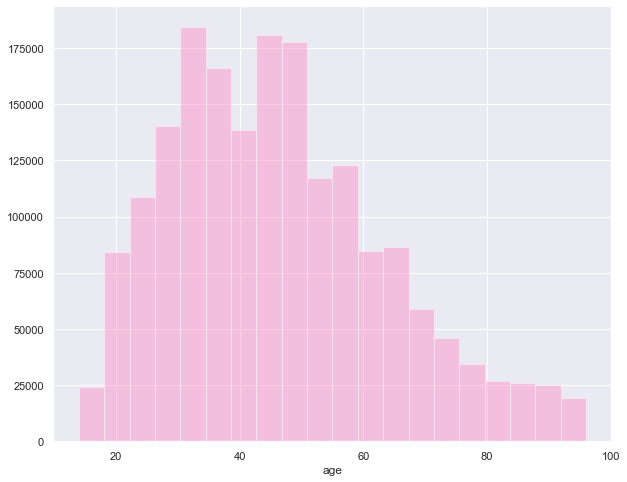

In [17]:
sns.set()
plt.figure(figsize=(10,8))
sns.distplot(df['age'], color = "#ff81c0", bins = 20, kde=False)

### Transactions by Gender, Category

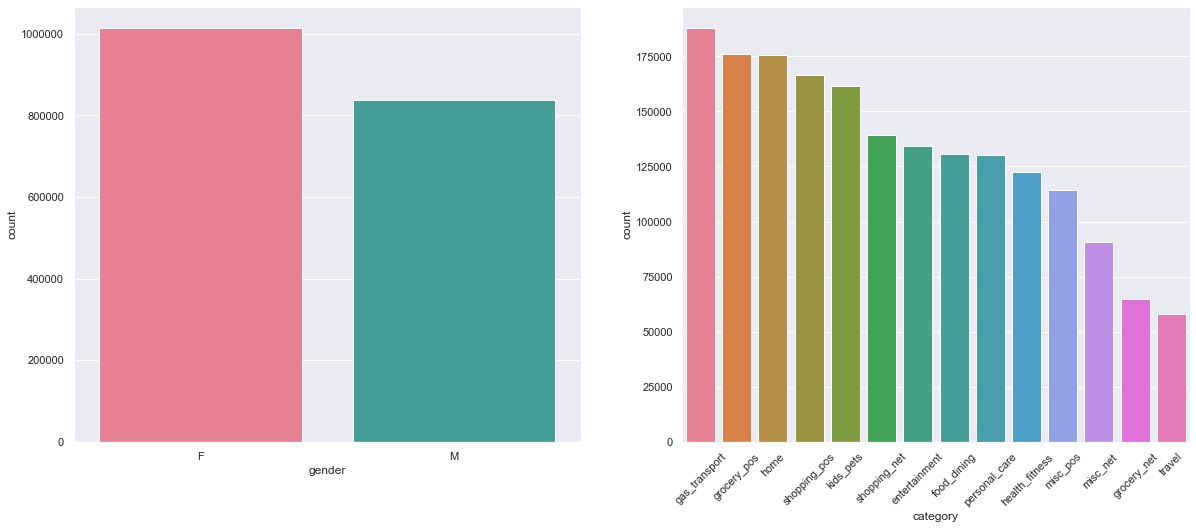

In [18]:
sns.set()
plt.figure(figsize=(20, 8)) # plt.figure()
plt.subplot(1,2,1) # plt.subplot(nrows, ncols, index)
sns.countplot(x = df['gender'], data = df, palette = 'husl');
plt.subplot(1,2,2)
sns.countplot(x = df['category'], data = df, order = df['category'].value_counts().index, palette = 'husl')
plt.xticks(rotation = 45);

### Transactions by Merchant

In [19]:
df.merchant.value_counts(normalize=True, ascending=False).head()

fraud_Kilback LLC    0.003380
fraud_Cormier LLC    0.002832
fraud_Schumm PLC     0.002804
fraud_Kuhn LLC       0.002716
fraud_Boyer PLC      0.002699
Name: merchant, dtype: float64

In [20]:
df_merchant = df[['merchant','trans_num']].groupby(['merchant']).count().reset_index()
df_merchant.columns = ['Merchant','merchant_count']

df_merchant['percent'] = (df_merchant['merchant_count']/df_merchant['merchant_count'].sum())*100

df_merchant.sort_values(by = ['percent'], ascending=False).head()

,Merchant,merchant_count,percent
316,fraud_Kilback LLC,6262,0.338049
105,fraud_Cormier LLC,5246,0.283201
571,fraud_Schumm PLC,5195,0.280448
349,fraud_Kuhn LLC,5031,0.271594
70,fraud_Boyer PLC,4999,0.269867


In [21]:
df_fraud_merchant = df[['merchant','is_fraud','trans_num']].groupby(['merchant','is_fraud']).count().reset_index()
df_fraud_merchant.columns = ['Merchant','is_fraud','count']

df_fraud_merchant = df_fraud_merchant.merge(df_merchant[['Merchant','merchant_count','percent']],how='inner',\
                                  left_on='Merchant',right_on='Merchant')


df_fraud_merchant['percent_grp'] = (df_fraud_merchant['count'] / df_fraud_merchant['merchant_count'])*100

In [22]:
df_fraud_merchant[df_fraud_merchant['is_fraud'] == 1].sort_values(by = ['percent_grp'],ascending=False).head()

,Merchant,is_fraud,count,merchant_count,percent,percent_grp
673,fraud_Kozey-Boehm,1,60,2758,0.148888,2.175489
490,"fraud_Herman, Treutel and Dickens",1,38,1870,0.100950,2.032086
1226,fraud_Terry-Huel,1,56,2864,0.154611,1.955307
607,fraud_Kerluke-Abshire,1,50,2635,0.142248,1.897533
884,"fraud_Mosciski, Ziemann and Farrell",1,53,2821,0.152289,1.878766


### Distribution of Transaction Amount

In [23]:
pd.concat(
[df['amt'].describe(percentiles = [0.5,0.95,0.999])\
.reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
df.loc[df['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Non Fraud Amt Distribution'}),
df.loc[df['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})],
axis=1
)

,Row Type,Overall Amt Distribution,Non Fraud Amt Distribution,Fraud Amt Distribution
0,count,1.852394e+06,1.842743e+06,9651.000000
1,mean,7.006357e+01,6.765128e+01,530.661412
2,std,1.592540e+02,1.535481e+02,391.028873
3,min,1.000000e+00,1.000000e+00,1.060000
4,50%,4.745000e+01,4.724000e+01,390.000000
5,95%,1.953400e+02,1.895900e+02,1084.090000
6,99.9%,1.517241e+03,1.519623e+03,1293.127000
7,max,2.894890e+04,2.894890e+04,1376.040000


Fraud Transaction mean is higher than non-fraud transaction  
Mean of Non-Fraud Transactions: 67.6  
Mean of Fraud Transactions: 530.6

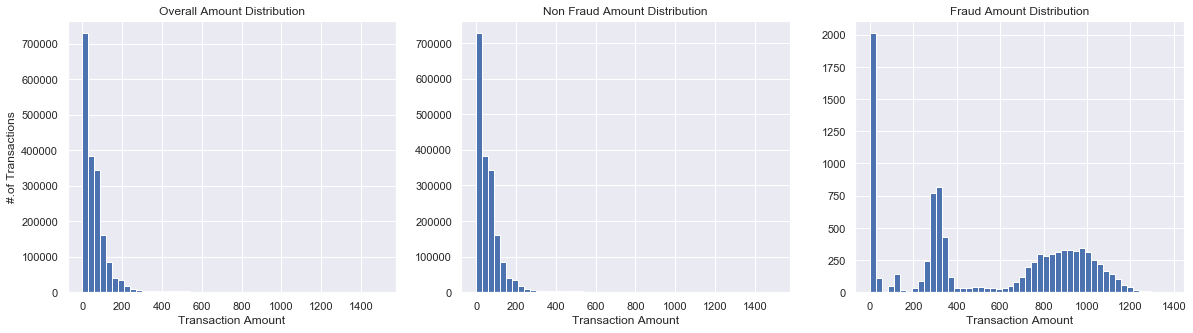

In [24]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(df[df['amt']<=1500]['amt'], bins=50)
ax[1].hist(df[(df['is_fraud']==0) & (df['amt']<=1500)]['amt'], bins=50)
ax[2].hist(df[(df['is_fraud']==1) & (df['amt']<=1500)]['amt'], bins=50)


ax[0].set_title('Overall Amount Distribution')
ax[1].set_title('Non Fraud Amount Distribution')
ax[2].set_title('Fraud Amount Distribution')

ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('#.of Transactions')

ax[1].set_xlabel('Transaction Amount')
ax[2].set_xlabel('Transaction Amount')
plt.show()

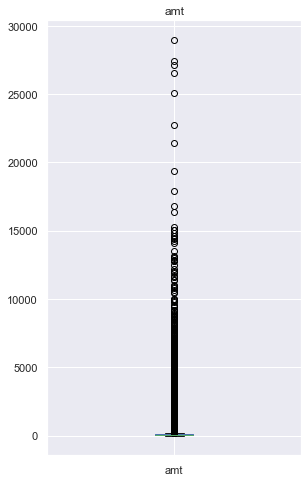

In [25]:
num_cols=['amt']
plt.figure(figsize=[10,8])
for ind, col in enumerate(num_cols):
    plt.subplot(1,2,ind+1)
    df[col].plot.box()
    plt.title(col)
plt.show()

### Transactions by Month of Year, Day of Week

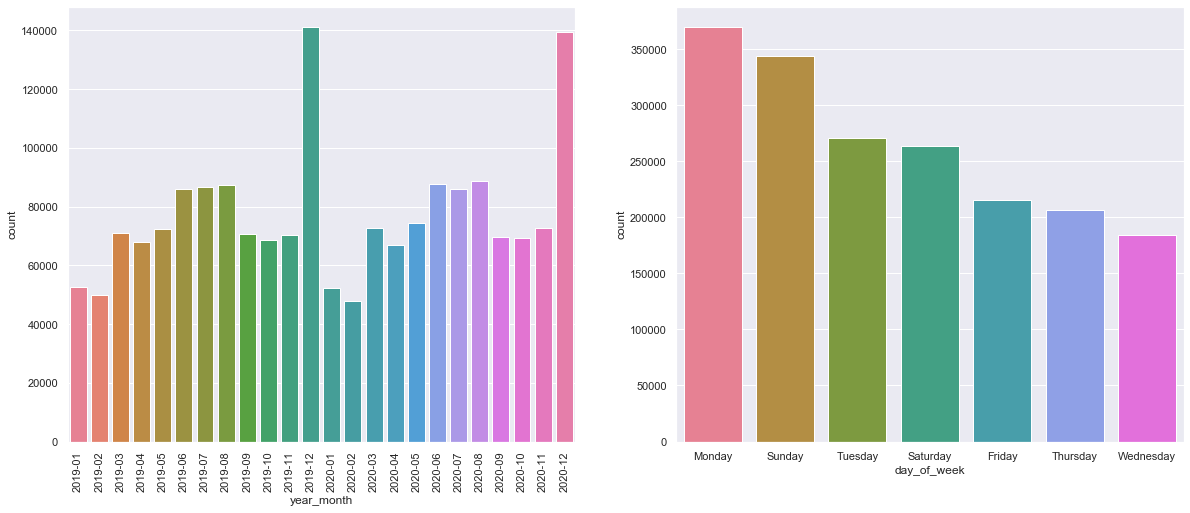

In [26]:
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
sns.countplot(x = df['year_month'], data = df, palette = 'husl')
plt.xticks(rotation = 90);
plt.subplot(1,2,2)
sns.countplot(x = df['day_of_week'], data = df, order = df['day_of_week'].value_counts().index, palette = 'husl');

Highest number of transactions is in December. Lowest number of transactions happens in February.
Monday and Sunday of the week have highest credit card transactions.

### One-Hot Encoding

In [27]:
category_onehot = pd.get_dummies(df.category, prefix='category', drop_first=True)
gender_onehot = pd.get_dummies(df.gender, prefix='gender', drop_first=True)
day_of_week_onehot = pd.get_dummies(df.day_of_week, prefix='week',drop_first=True)

In [28]:
df1 = pd.concat([df, category_onehot,gender_onehot,day_of_week_onehot], axis=1)

In [29]:
df1.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0,0,0,0,0,0,0,0,1,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,0,0,0,0,0,0,0,0,1,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,0,0,0,1,0,0,0,0,1,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,0,0,0,1,0,0,0,0,1,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,0,0,0,1,0,0,0,0,1,0


In [30]:
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [31]:
df1['dist'] = \
    haversine(df1['lat'], df1['long'],
                 df1['merch_lat'], df1['merch_long'])

In [32]:
df1['dist'].describe()

count    1.852394e+06
mean     7.611173e+01
std      2.911697e+01
min      2.225452e-02
25%      5.532009e+01
50%      7.821638e+01
75%      9.850947e+01
max      1.521172e+02
Name: dist, dtype: float64

In [33]:
df1.dtypes

trans_date_trans_time      datetime64[ns]
cc_num                              int64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                             object
street                             object
city                               object
state                              object
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                object
dob                        datetime64[ns]
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
trans_hour                          int64
day_of_week                       

In [34]:
df1.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_hour', 'day_of_week', 'year_month',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M', 'week_Monday', 'week_Saturday', 'week_Sunday',
       'week_Thursday', 'week_Tuesday', 'week_Wednesday', 'dist'],
      dtype='object')

### Historical Transactions

In [35]:
df1.index = pd.to_datetime(df1['trans_date_trans_time'])
df1 = df1.rename_axis(index={'trans_date_trans_time': 'time_index'})
df1 = df1.sort_index()
df1.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday,dist
time_index,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:18,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0,0,0,0,0,0,0,1,0,78.597568
2019-01-01 00:00:44,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,0,0,0,0,0,0,0,1,0,30.212176
2019-01-01 00:00:51,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,0,0,1,0,0,0,0,1,0,108.206083
2019-01-01 00:01:16,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,0,0,1,0,0,0,0,1,0,95.673231
2019-01-01 00:03:06,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,0,0,1,0,0,0,0,1,0,77.556744


In [36]:
df1['val_for_agg'] = 1

#### 60 Days Transactions by Customer

In [37]:
df_hist_trans_60d = \
    df1 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('60D')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_trans_60d.columns = ['cc_num','trans_date','hist_trans_60d']

In [38]:
df_hist_trans_60d['trans_date'] = df_hist_trans_60d['trans_date'].dt.date

In [39]:
df_hist_trans_60d = df_hist_trans_60d.groupby(['cc_num','trans_date'])['hist_trans_60d'].min().reset_index()

In [40]:
df_hist_trans_60d.head()

,cc_num,trans_date,hist_trans_60d
0,60416207185,2019-01-01,0.0
1,60416207185,2019-01-02,1.0
2,60416207185,2019-01-03,5.0
3,60416207185,2019-01-04,7.0
4,60416207185,2019-01-05,9.0


#### 24 Hours Transactions by Customer

In [41]:
df_hist_orders_24h = \
    df1 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_orders_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_24h']

In [42]:
df_hist_orders_24h.head()

,cc_num,trans_date_trans_time,hist_trans_24h
0,60416207185,2019-01-01 12:47:15,0.0
1,60416207185,2019-01-02 08:44:57,1.0
2,60416207185,2019-01-02 08:47:36,2.0
3,60416207185,2019-01-02 12:38:14,3.0
4,60416207185,2019-01-02 13:10:46,4.0


#### 24 Hours Fraud Transactions by Customer

In [43]:
df_hist_fraud_trans_24h = \
    df1[df1['is_fraud']== 1]\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_24h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_24h']

In [44]:
df_hist_fraud_trans_24h.head()

,cc_num,trans_date_trans_time,hist_fraud_trans_24h
0,60416207185,2019-03-01 01:32:53,0.0
1,60416207185,2019-03-01 02:42:25,1.0
2,60416207185,2019-03-01 23:06:58,2.0
3,60416207185,2019-03-02 22:10:38,3.0
4,60416207185,2019-03-02 22:10:59,2.0


#### 2 Hours Fraud Transactions by Customers

In [45]:
df_hist_fraud_trans_2h = \
    df1[df1['is_fraud']== 1]\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('2H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_2h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_2h']

In [46]:
df_hist_fraud_trans_2h.head()

,cc_num,trans_date_trans_time,hist_fraud_trans_2h
0,60416207185,2019-03-01 01:32:53,0.0
1,60416207185,2019-03-01 02:42:25,1.0
2,60416207185,2019-03-01 23:06:58,2.0
3,60416207185,2019-03-02 22:10:38,1.0
4,60416207185,2019-03-02 22:10:59,1.0


#### 60 Days Average Transaction Amount by Customers

In [47]:
df_hist_trans_amt_avg_60d = \
    df1 \
    .groupby(['cc_num'])['amt']\
    .rolling('60D')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_60d.columns = ['cc_num','trans_date','hist_trans_avg_amt_60d']

In [48]:
df_hist_trans_amt_avg_60d['trans_date'] = df_hist_trans_amt_avg_60d['trans_date'].dt.date

In [49]:
df_hist_trans_amt_avg_60d = df_hist_trans_amt_avg_60d.groupby(['cc_num','trans_date'])\
['hist_trans_avg_amt_60d'].min().reset_index()

In [50]:
df_hist_trans_amt_avg_60d.head(10)

,cc_num,trans_date,hist_trans_avg_amt_60d
0,60416207185,2019-01-01,0.000000
1,60416207185,2019-01-02,7.270000
2,60416207185,2019-01-03,35.188333
3,60416207185,2019-01-04,31.365714
4,60416207185,2019-01-05,40.378889
5,60416207185,2019-01-06,43.053636
6,60416207185,2019-01-07,48.005000
7,60416207185,2019-01-08,60.016154
8,60416207185,2019-01-09,70.423125
9,60416207185,2019-01-10,69.753889


### Merging Historical Variables with Transactions

In [51]:
df1['trans_date'] = df1['trans_date_trans_time'].dt.date

In [52]:
df2 = df1.merge(df_hist_trans_60d, left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [53]:
df2 = df2.merge(df_hist_orders_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_fraud_trans_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_fraud_trans_2h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_trans_amt_avg_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [54]:
df2[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']]= \
df2[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']].fillna(0)

In [55]:
df2.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,week_Tuesday,week_Wednesday,dist,val_for_agg,trans_date,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_fraud_trans_2h,hist_trans_avg_amt_60d
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1,0,78.597568,1,2019-01-01,1.0,6.0,0.0,0.0,4.970000
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1,0,30.212176,1,2019-01-01,1.0,1.0,0.0,0.0,47.488421
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1,0,108.206083,1,2019-01-01,8.0,5.0,0.0,0.0,377.925000
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1,0,95.673231,1,2019-01-01,1.0,5.0,0.0,0.0,45.000000
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1,0,77.556744,1,2019-01-01,1.0,6.0,0.0,0.0,41.960000


In [56]:
df2['hist_fraud_trans_24h'] = df2['hist_fraud_trans_24h'] - df2['hist_fraud_trans_2h']

In [57]:
cols = ['amt','city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday','dist','hist_trans_60d','hist_trans_24h',
       'hist_fraud_trans_24h','hist_trans_avg_amt_60d','is_fraud']

In [58]:
corr = df2[cols].corr()

### Modeling

In [59]:
X_cols = ['amt','city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday','dist','hist_trans_60d','hist_trans_24h',
       'hist_fraud_trans_24h','hist_trans_avg_amt_60d']
Y_cols = ['is_fraud']

In [60]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

#### Oversampling

In [61]:
# As this dataset is highly imbalanced we have to balance this by oversampling
cnt_non_fraud = df2[df2['is_fraud'] == 0]['amt'].count()
df2_class_fraud = df2[df2['is_fraud'] == 1]
df2_class_nonfraud = df2[df2['is_fraud'] == 0]

In [62]:
# OverSampling
df2_class_fraud_oversample = df2_class_fraud.sample(cnt_non_fraud, replace=True)
df2_oversampled = pd.concat([df2_class_nonfraud, df2_class_fraud_oversample], axis=0)

print('Random over-sampling:')
print(df2_oversampled['is_fraud'].value_counts())

Random over-sampling:
1    1842831
0    1842831
Name: is_fraud, dtype: int64


In [63]:
df2_oversampled.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,week_Tuesday,week_Wednesday,dist,val_for_agg,trans_date,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_fraud_trans_2h,hist_trans_avg_amt_60d
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1,0,78.597568,1,2019-01-01,1.0,6.0,0.0,0.0,4.970000
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1,0,30.212176,1,2019-01-01,1.0,1.0,0.0,0.0,47.488421
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1,0,108.206083,1,2019-01-01,8.0,5.0,0.0,0.0,377.925000
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1,0,95.673231,1,2019-01-01,1.0,5.0,0.0,0.0,45.000000
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1,0,77.556744,1,2019-01-01,1.0,6.0,0.0,0.0,41.960000


In [64]:
# Split into train and test sets, train_test_split(X, y, test_size, random_state)
# 0.7 for train set and 0.3 for test set
X_train, X_test, y_train, y_test = train_test_split(df2_oversampled[X_cols], df2_oversampled[Y_cols], train_size=0.7, test_size=0.3, random_state=42)

In [65]:
X_train.shape

(2579963, 29)

In [66]:
X_test.shape

(1105699, 29)

### Logistic Regression

In [67]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

In [68]:
# Initiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression(random_state=42)

In [69]:
# Fit logreg to the train set
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [71]:
# Use logreg to predict instances from the train set and test set
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

In [72]:
# fraud = 1, non-fraud = 0
y_test_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [73]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[1199959   90049]
 [ 314274  975681]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.86   1290008
           1       0.92      0.76      0.83   1289955

    accuracy                           0.84   2579963
   macro avg       0.85      0.84      0.84   2579963
weighted avg       0.85      0.84      0.84   2579963



Training data  
Accuracy - 84%  
Precision - 92%  
Recall - 76%  

In [74]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[514502  38321]
 [134468 418408]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.86    552823
           1       0.92      0.76      0.83    552876

    accuracy                           0.84   1105699
   macro avg       0.85      0.84      0.84   1105699
weighted avg       0.85      0.84      0.84   1105699



Testing data  
Accuracy - 84%  
Precision - 92%  
Recall   - 76%

### Decision Tree

In [75]:
# Building Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, random_state=0)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [76]:
print("Train Results")
pred_train = dt_clf.predict(X_train)

print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

Train Results
[[1288587    1421]
 [      0 1289955]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1290008
           1       1.00      1.00      1.00   1289955

    accuracy                           1.00   2579963
   macro avg       1.00      1.00      1.00   2579963
weighted avg       1.00      1.00      1.00   2579963



Training data  
Accuracy - 100%  
Precision - 100%  
Recall - 100%

In [77]:
print("Test Results")
pred_test = dt_clf.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

Test Results
[[552048    775]
 [     0 552876]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552823
           1       1.00      1.00      1.00    552876

    accuracy                           1.00   1105699
   macro avg       1.00      1.00      1.00   1105699
weighted avg       1.00      1.00      1.00   1105699



Testing data  
Accuracy - 100%  
Precision - 100%  
Recall - 100%

### Random Forest

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rf_clf = RandomForestClassifier(random_state=345)

param_grid = { 
    'n_estimators': [50],
    'max_depth' : [8,16,20]
}

#### Grid Search Random Forest

In [81]:
#best_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv = 3, verbose=1, n_jobs = -1)
#best_rf.fit(X_train, y_train)

In [82]:
#best_rf.best_estimator_

In [83]:
#Building Random Forest Model
rf_clf = RandomForestClassifier(n_estimators = 50,max_depth = 20,
                                random_state=345, verbose = 1)
rf_clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.8min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=345,
                       verbose=1, warm_start=False)

In [84]:
print("Train Results")
pred_train = rf_clf.predict(X_train)

print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

Train Results


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   15.2s finished


[[1289877     131]
 [    261 1289694]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1290008
           1       1.00      1.00      1.00   1289955

    accuracy                           1.00   2579963
   macro avg       1.00      1.00      1.00   2579963
weighted avg       1.00      1.00      1.00   2579963



Training data  
Accuracy - 100%  
Precision - 100%  
Recall - 100%

In [85]:
print("Test Results")
pred_test = rf_clf.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

Test Results


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    6.5s finished


[[552732     91]
 [   113 552763]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552823
           1       1.00      1.00      1.00    552876

    accuracy                           1.00   1105699
   macro avg       1.00      1.00      1.00   1105699
weighted avg       1.00      1.00      1.00   1105699



Testing data  
Accuracy - 100%  
Precision - 100%    
Recall - 100%

### Gradient Boosting

In [86]:
import sys
!{sys.executable} -m pip install xgboost

In [87]:
# Build XG Boost Model
from xgboost import XGBClassifier

# Fit model no training data
xbt_model = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state=345, verbose = 1)
xbt_model.fit(X_train, y_train)

xbt_model.fit(X_train, y_train)

[13:02:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:02:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:04:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=345, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=True, validate_parameters=1, verbose=1, ...)

In [88]:
pred_train = xbt_model.predict(X_train)

In [89]:
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

[[1281737    8271]
 [  28498 1261457]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99   1290008
           1       0.99      0.98      0.99   1289955

    accuracy                           0.99   2579963
   macro avg       0.99      0.99      0.99   2579963
weighted avg       0.99      0.99      0.99   2579963



Training data  
Accuracy - 99%  
Precision - 99%  
Recall   - 98%

In [90]:
pred_test = xbt_model.predict(X_test)

In [91]:
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

[[549322   3501]
 [ 12416 540460]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    552823
           1       0.99      0.98      0.99    552876

    accuracy                           0.99   1105699
   macro avg       0.99      0.99      0.99   1105699
weighted avg       0.99      0.99      0.99   1105699



Testing data  
Accuracy - 99%  
Precision - 99%  
Recall   - 98%

### Significant Variables

In [92]:
# Get the best coefficients
feature_imp = logreg.coef_
coef_table = pd.DataFrame({"feature_names":X_train.columns, "Beta":feature_imp[0], "AbsBeta":abs(feature_imp[0])})

# Get the sorted values
coef_table = coef_table.sort_values(by = 'AbsBeta', ascending = False)
print("The most important features in the model are: \n")
coef_table.head(10)

The most important features in the model are: 



,feature_names,Beta,AbsBeta
0,amt,0.007437,0.007437
3,age,-0.007192,0.007192
28,hist_trans_avg_amt_60d,0.006849,0.006849
25,hist_trans_60d,-0.006270,0.006270
24,dist,-0.006268,0.006268
27,hist_fraud_trans_24h,0.003597,0.003597
2,trans_hour,-0.002552,0.002552
26,hist_trans_24h,0.000814,0.000814
17,gender_M,-0.000160,0.000160
5,category_gas_transport,0.000159,0.000159
